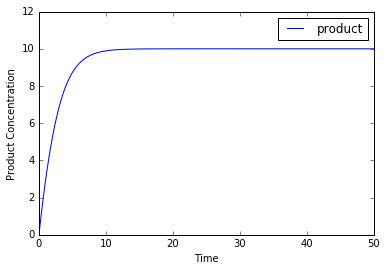

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
  
def michelis_menten(y, t, *args):
    Vmax = args[0]
    km = args[1]
    St = args[2]
    P = y[0]
    S = St - P
     
    dP = Vmax * (S / (S+km))
    return dP
 
# Parameters MM
Vmax = 10
km = 20
St = 10
mm_params = (Vmax, km, St)
 
  
# Initial Conditions MM
P_0 = 0
  
# Timesteps
n_steps = 1000
t = np.linspace(0, 50, n_steps)
  
num_P = odeint(michelis_menten, P_0, t, args = (mm_params)).flatten()
 
plt.plot(t, num_P, 'b-', label = 'product')
plt.xlabel('Time')
plt.ylabel('Product Concentration')
plt.legend(loc = 'best')
plt.show()

In [3]:
exp_P = num_P + np.random.randn(len(num_P)) * 0.2
# Create experimental data.  Just take the regular simulation data and add some gaussian noise to it.

In [4]:
def residuals(p):
    p = tuple(p)
    sim_P = odeint(michelis_menten, P_0, t, args = p).flatten()
    res = sim_P - exp_P
    return res.flatten()

In [5]:
from scipy.optimize import leastsq
initial_guess = [10, 10, 10]
fitted_params = leastsq(residuals, initial_guess)[0]

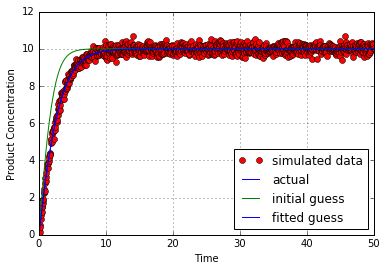

In [6]:
plt.plot(t, exp_P, 'ro',   label='simulated data')
plt.plot(t, odeint(michelis_menten, P_0, t, args = tuple(mm_params)),  label='actual')
plt.plot(t, odeint(michelis_menten, P_0, t, args = tuple(initial_guess)), 'g-',  label='initial guess')
plt.plot(t, odeint(michelis_menten, P_0, t, args = tuple(fitted_params)), 'b-',  label='fitted guess')
plt.legend(loc = 'best')
plt.xlabel('Time')
plt.ylabel('Product Concentration')
plt.grid()
plt.show()

In [7]:
print(mm_params)

(10, 20, 10)


In [8]:
print(fitted_params)

[ 10.89831427  22.26205981  10.00692428]
